# Les Algorithmes génétiques

<div align="justify">
Les algorithmes génétiques sont une classe d’algorithmes appartenant à la famille des algorithmes évolutionnistes (bioinspirés) dont le principe s’inspire de la théorie de l’évolution pour résoudre des
problèmes divers. Leur objectif est d’obtenir une solution approchée à un problème d’optimisation en partant d’un ensemble de solutions potentielles au problèmes et en leur faisant subir un processus de sélection naturelle.
</div>
<div align="justify">
Dans la suite, on va considérer une fonction réelle à une variable, que l’on notera f, dont on cherche à calculer un extrémum global dans un intervalle donné [a,b].
</div>

## 1. Générer une population

<div align="justify">Nous allons considérer une <b>population</b> de N <b>individus</b>. Un individu représente le dispositif que l’on cherche à optimiser. Comme dans le cas biologique, on va considérer qu’un individu est composé de un ou plusieurs <b>chromosomes</b>, ces derniers étant composés de un ou plusieurs <b>gènes</b>. Un gène correspond à une variable d’optimisation $x_i$.

![](https://github.com/thierrycondamines/NSI/Algorithmes_genetiques/ga10.gif)

<div align="justify">Dans le cas simple d’une fonction à une variable réelle, un individu sera composé d’un seul chromosome (on pourra alors confondre individu et chromosome), lui-même constitué d’un seul gène codant la valeur de $x$. D’un point de vue informatique, on utilise souvent un codage binaire, c’est à dire qu’un gène est un entier long (32 bits). Il en existe d’autres (codage de Gray, …). L’avantage du codage binaire est de pouvoir coder n’importe quel objet : réel, entier, booléen, chaîne de caractère, … Il faudra juste écrire des fonctions de codage et de décodage pour passer d’une représentation à l’autre.</div>

<div align="justify">Pour coder notre variable réelle x en binaire, nous allons discrétiser notre intervalle. Ainsi, sur 32 bits, nous discrétisons notre intervalle en $g_{max} = 2^{32}-1 = $ 4 294 967 295 valeurs discrètes. On va alors associer à $x$ un entier long $g$ compris entre $0$ et $g_{max}$. Les formules de codage et décodage sont alors les suivantes :</div>

- Codage : $g = \frac{x-a}{b-a} \times g_{max}$
- Décodage : $x = a + (b-a) \times \frac{g}{g_{max}}$

<div align="justify">La première étape de l’algorithme va être de générer notre population, c’est à dire un ensemble de $N$ valeurs de départ de l’intervalle $[a,b]$. On pourrait prendre des individus régulièrement répartis dans l’intervalle, mais on utilise souvent une initialisation aléatoire : les valeurs des gènes sont tirés au hasard selon une distribution uniforme. Le choix de la taille $N$ de la population devra être choisi dans un compromis entre temps de calcul et qualité de la solution. On pourra prendre ici $N = 20$ par exemple.</div>

On considère les variables suivantes (paramètres de l’algorithme génétique) :

In [3]:
import numpy as np
import matplotlib.pyplot as plt

population_size = 20           # Taille de la population (nombre de chromosomes)
generations     = 100          # Nombre de générations (évolution de la population)
selection_rate  = 1.           # Taux de sélection du meilleur chromosome
mutation_rate   = 0.01         # Taux de mutation (ici 1%)
bit_length      = 16           # ou 32 bits/gènes, taille de la châine binaire représentant un chromosome 
x_range         = (-10 , 10)   # intervalle de recherche de l'optimum

1. <div align="justify">Ecrivez un fonction de codage $real\_to\_binary(x,x\_range,bit\_length)$ qui convertit la valeur réelle $x$ en représentation binaire sous forme d’une chaîne de caractères. Par exemple $x=3.256$ sera converti en '$1010100110101100$' en 16 bits.</div>

In [5]:
def real_to_binary(x, x_range, bit_length):
    ...
    return f"{...:0{bit_length}b}"

2.	<div align="justify">Ecrivez une fonction de décodage $binary\_to\_real(binatry\_str, x\_range)$ qui convertit une représentation binaire sous forme d’une chaîne de caractères en un nombre réel. Dans l’exemple précédent '$1010100110101100$’ sera converti en $3.2558175020981164$.</div>

In [6]:
def binary_to_real(binary_str, x_range):
    ...
    return ...

3.	<div align="justify">Ecrivez une fonction $initialize\_population(pop\_size, bit\_length)$ qui retourne une liste de chaînes binaires de $bit\_length$ bits :</div>

In [7]:
# Initialisation de la population (chaînes binaires)
def initialize_population(pop_size, bit_length):
    return [f"{np.random.randint(0, 2**bit_length):0{bit_length}b}" for _ in range(pop_size)]

<div align="justify">On utilise, pour simplifier, ici les f-string python. np est l’alias de la bibliothèque numpy. Ne pas oublier les import au début du fichier. </div>

## 2. Fonction d’évaluation (fitness)

Il s’agit ici de la fonction à optimiser.

4.	<div align="justify">Ecrivez une fonction $fitness(x)$ qui retourne la valeur de $f(x)$ pour $x$ réel. Par exemple : </div>

In [8]:
# Fonction à optimiser (f(x) = x^2 - 4x + 4)
def fitness(x):
    return x**2 - 4*x + 4

## 3. Sélection / élimination

<div align="justify">On appelle <b>génération</b> la population à un instant $t$ donné. Une fois qu’on a réalisé l’évaluation de tous les individus de la population, on opère une sélection de $N/2$ couples d’individus qui vont pouvoir se reproduire. Il existe plusieurs méthodes de sélection (plus ou moins élitistes). Nous allons utiliser une <b>sélection par tournoi</b>. Deux individus sont choisis au hasard et combattent en comparant leur fitness (valeur de la fonction d’évaluation). Le plus adapté l’emporte.</div> 

*Remarque :* Ici la probabilité que l’individu qui a la meilleure valeur de fitness soit gagnant ($selection\_rate$) est égale à 1, ce qui peut induire un certain élitisme pénalisant l’efficacité de l’algorithme. On peut introduire une probabilité légèrement inférieur à 1 que le meilleur individu l’emporte.

5.	<div align="justify">Écrire une fonction $selection(population,selection\_rate)$ qui tire au hasard 2 individus de la population, calcule leur valeur de fitness et retourne le meilleur avec une probabilité $selection\_rate$.</div>

In [10]:
# Sélection par tournoi
def selection(population):
    ...
    return ...

## 4. Opérateur croisement (crossover)

<div align="justify">Lorsque 2 individus ont été sélectionnés, les chromosomes sont alors combinés de façon à former deux descendants possédant des caractéristiques issues des parents. Cette opération de croisement favorise l’espace de recherche par un brassage du matériel génétique. Il existe plusieurs types de croisements dont les suivants :</div>

- Le croisement en un point : on choisit au hasard un point de croisement pour chaque couple (au niveau binaire) et on échange les parties de chromosomes :

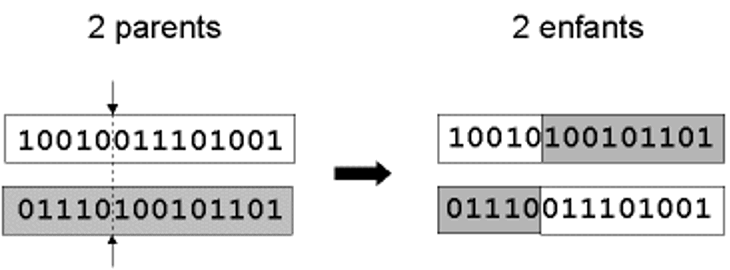

In [17]:
from IPython.display import Image
Image(filename="croisement1.gif")

- Le croisement en deux points : On choisit au hasard deux points de croisement :

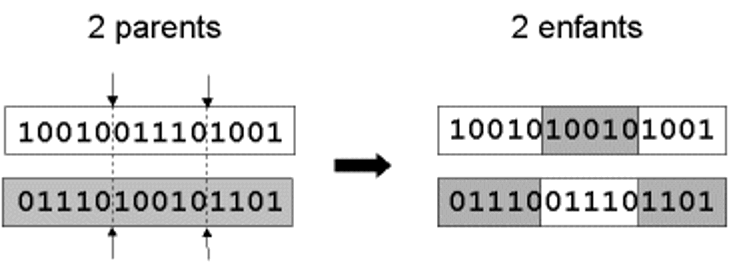

In [16]:
from IPython.display import Image
Image(filename="croisement2.gif")

<div align="justify">Le croisement en 2 points est souvent plus efficace que le premier. Il en existe d’autres plus complexes (croisement en k points, croisement uniforme, …). Par simplicité on implantera ici le croisement en 1 point.</div>

6.	<div align="justify">Écrire une fonction $crossover(parent1,parent2)$ qui réalise le croisement de deux individus et retourne 2 descendants.</div>

In [ ]:
# Croisement (crossover)
def crossover(parent1, parent2):
    ...
    return child1, child2

## 5. Opérateur de mutation

<div align="justify">Une mutation correspond à l’inversion d’un bit/gène dans un chromosome. Les mutations jouent le rôle de bruit et empêchent l’évolution de se figer, permettant ainsi d’assurer une recherche aussi bien locale que globale, selon le poids et le nombre de bits mutés. De plus elles garantissent mathématiquement que l’optimum global peut être atteint...au bout d'un certain temps.</div>

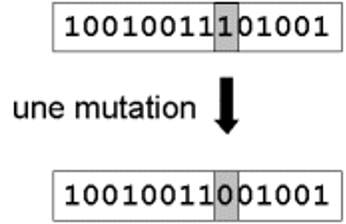

In [18]:
from IPython.display import Image
Image(filename="mutation.gif")

<div align="justify">Elles évitent également l’homogénéisation d’une population à cause des erreurs stochastiques : les gênes favorisés par le hasard peuvent en effet se répandre au détriment des autre (dérive génétique). Les mutations apportent de nouveaux gènes constamment.</div>

<div align="justify">Ici aussi il existe plusieurs méthodes. La probabilité $p$ qu’un bit mute est souvent comprise entre $0.001$ et $0.01$. On peut aussi prendre $p =1/l$ où $l$ est le nombre de bits composant un chromosome. On peut aussi associer une probabilité différente à chaque gène et elles peuvent être fixes ou évoluer dans le temps. Nous allons ici prendre un cas simple en utilisant un taux fixe de $0.01$ (on pourra tester d’autres valeurs).</div>

7.	<div align="justify">Écrire une fonction $mutate(binary\_str, mutation\_rate)$ qui tire une nombre au hasard entre $0$ et $1$ à l’aide de $np.random.rand()$ pour chaque bit de $binary\_str$. Si ce nombre est inférieur à $mutation\_rate$, on mute le bit.</div>

In [ ]:
# Mutation
def mutate(binary_str, mutation_rate):
    binary_list = list(binary_str) # Pour transformer une chaîne de caractères en liste
    ...
    return ''.join(binary_list) # pour transformer une liste en chaîne de caractères

## 6. Algorithme génétique

<div align="justify">Nous avons tous les éléments pour écrire l’algorithme complet qui utilise les fonctions ci-dessus. En voici les étapes : </div>

- Générer une population de départ, soit une liste de $population\_size$ chaînes de caractères binaires.
- Créer une liste vide $history$ qui va stocker les valeurs de fitness des meilleurs individus à chaque génération
- Nous allons réaliser $100$ générations et pour chacune d’elle :
    - Nous allons faire $N/2$ fois :
        - Sélectionner deux individus $parent1$ et $parent 2$
        - Faire un croisement de ces individus pour obtenir deux descendants $child1$ et $child2$
        - Faire une mutation sur $child1$ et $child2$
        - Mettre $child1$ et $child2$ dans la future génération
    - On obtient ainsi une nouvelle génération de $N$ individus.
    - Procédure d’élitisme (facultative) : si le meilleur individu de la génération parent n’a pas été sélectionné, il est copié dans la nouvelle génération à la place d’un individu choisi aléatoirement
    - On calcule la fitness du meilleur individu de la nouvelle génération que l’on rajoute à la liste $history$
    - On recommence le processus

In [12]:
# Fonction principale de l'algorithme génétique
def genetic_algorithm(population_size, generations, mutation_rate, bit_length, x_range):
    ...
    return history

On peut tracer l’évolution sur les 100 génération de la valeur du meilleur individu :

In [ ]:
# Exécution de l'algorithme génétique
history = genetic_algorithm(population_size, generations, mutation_rate, bit_length, x_range)

# Affichage des résultats
plt.plot(history)
plt.title("Évolution de la fitness au cours des générations")
plt.xlabel("Génération")
plt.ylabel("Fitness")
plt.show()

## 7. Tests plus intéressants

Vous pourrez tester votre algorithme sur des fonctions ayant plusieurs optima locaux comme par exemple :

•	La fonction de Rastrigin sur $[-5.12, 5.12]$. Elle possède de nombreux minima locaux et un minimum global en 0 avec f(0)=0 :
$$f(x) = x^2 -10 \times cos(2\pi x) + 10$$ 

•	La fonction de Schwefel sur $[-500,500]$ qui est très piégeuse avec beaucoup de minima locaux et un minimum global d’environ $420.9687$ avec $f(x) = -418.9829$ :
$$ f(x) = -x \times sin(\sqrt{|x|})$$

N’hésitez pas à ajuster les paramètres : taille de la population, taux de mutation, longueur de la chaîne binaire (passage de 16 à 32 bits) pour tester les effets sur la convergence de l’algorithme.